# **Random Forest Assignment**

# **Assignment 15(b)**

# ***2.Fraud_check DataSet(Fraud_check.csv)***

# **Importing Libraries**

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn import tree

# **Importing DataSet**

In [2]:
#importing DataSet
fraud=pd.read_csv('Fraud_check.csv')
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
fraud1=fraud.copy()

# **Exploratory Data Analysis**

In [4]:
fraud.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [5]:
fraud.shape

(600, 6)

In [6]:
#checking missing values
(fraud.isna().sum())/len(fraud)*100

Undergrad          0.0
Marital.Status     0.0
Taxable.Income     0.0
City.Population    0.0
Work.Experience    0.0
Urban              0.0
dtype: float64

In [7]:
fraud.isna().any()

Undergrad          False
Marital.Status     False
Taxable.Income     False
City.Population    False
Work.Experience    False
Urban              False
dtype: bool

In [8]:
#checking duplicates
fraud.duplicated().sum()

0

In [9]:
fraud[fraud.duplicated()]

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban


In [10]:
#datatypes
fraud.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [11]:
fraud.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [12]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


# **Feature Engineering**

**Let us assume taxable_income <= 30000 as "Risky" and others are "Good"**

In [13]:
# Let us assume Taxable.Income <= 30000 as "Risky" and others are "Good"

In [14]:
fraud['Taxable.Income'].describe()

count      600.000000
mean     55208.375000
std      26204.827597
min      10003.000000
25%      32871.500000
50%      55074.500000
75%      78611.750000
max      99619.000000
Name: Taxable.Income, dtype: float64

In [15]:
fraud['Tax']=pd.cut(x=fraud['Taxable.Income'],bins=[10002,30000,99620],labels=['Risky','Good'])

In [16]:
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Tax
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


In [17]:
#distplot

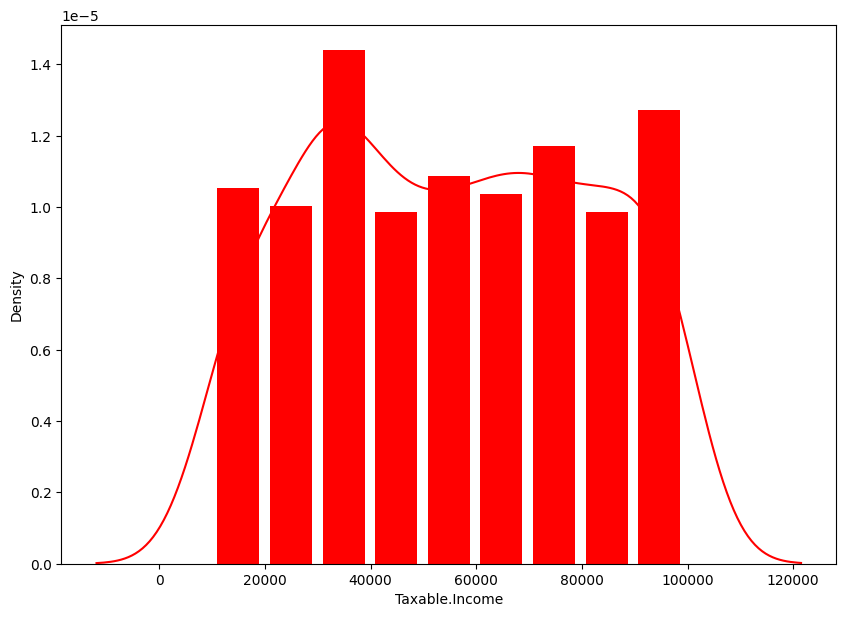

In [18]:
#displot
plt.figure(figsize=(10,7))
sns.distplot(fraud['Taxable.Income'],color='red',hist_kws={'rwidth':0.8,'alpha':1.0})
plt.show()

In [19]:
fraud['Tax'].value_counts()

Good     476
Risky    124
Name: Tax, dtype: int64

In [20]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Undergrad        600 non-null    object  
 1   Marital.Status   600 non-null    object  
 2   Taxable.Income   600 non-null    int64   
 3   City.Population  600 non-null    int64   
 4   Work.Experience  600 non-null    int64   
 5   Urban            600 non-null    object  
 6   Tax              600 non-null    category
dtypes: category(1), int64(3), object(3)
memory usage: 29.0+ KB


In [21]:
fraud['Tax']=fraud['Tax'].astype('O')

In [22]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
 6   Tax              600 non-null    object
dtypes: int64(3), object(4)
memory usage: 32.9+ KB


# **Correlation**

In [23]:
#correlation
fraud.corr()

,Taxable.Income,City.Population,Work.Experience
Taxable.Income,1.000000,-0.064387,-0.001818
City.Population,-0.064387,1.000000,0.013135
Work.Experience,-0.001818,0.013135,1.000000


# **Visualization**

# **Heatmap**

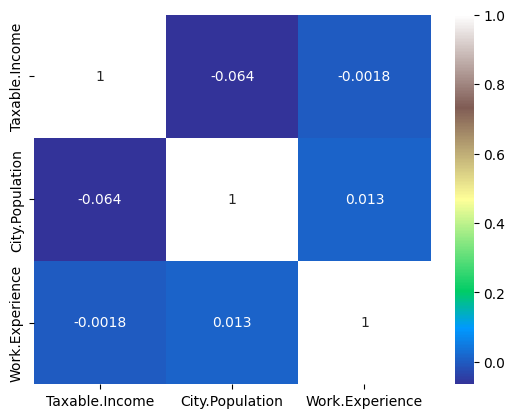

In [24]:
#heatmap
sns.heatmap(fraud.corr(),annot=True,cmap='terrain')
plt.show()

# **Pairplot**

<Figure size 1000x800 with 0 Axes>

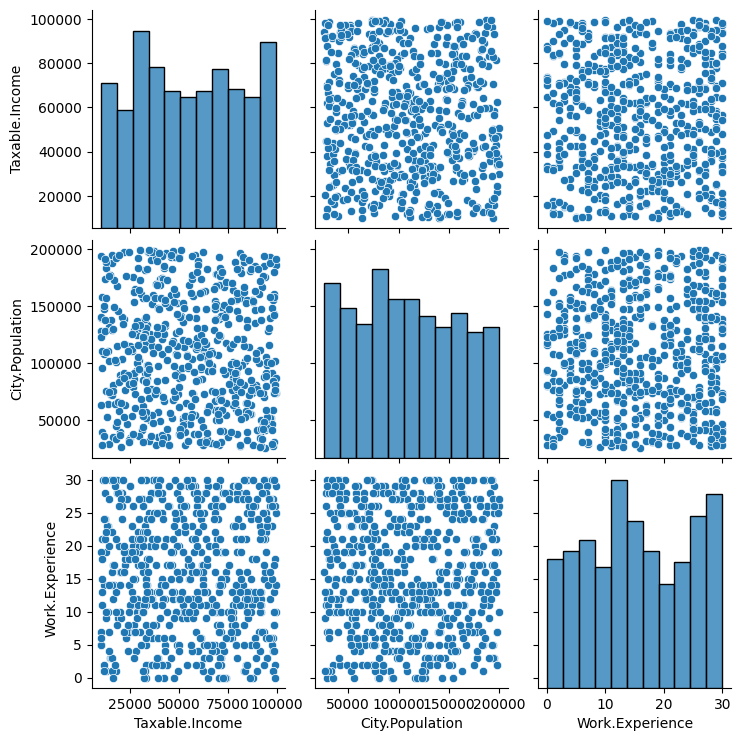

In [25]:
#pairplot
plt.figure(figsize=(10,8))
sns.pairplot(fraud,palette='dark')
plt.show()

# **Univariate plot**

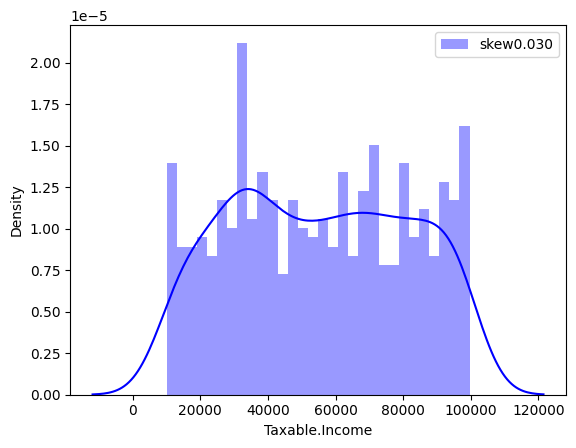

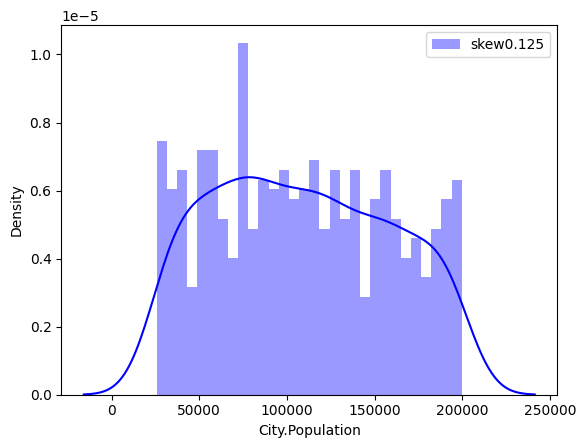

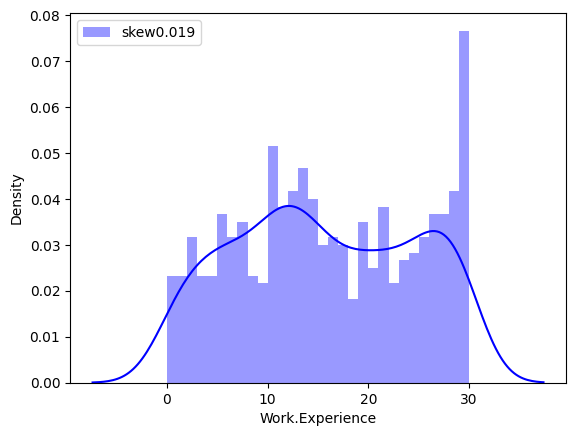

In [26]:
#distplot
numerical_features=[feature for feature in fraud.columns if fraud[feature].dtypes!='O']
for f in numerical_features:
  skew=fraud[f].skew()
  sns.distplot(fraud[f],label='skew%.3f'%skew,bins=30,color='blue')
  plt.legend()
  plt.show()

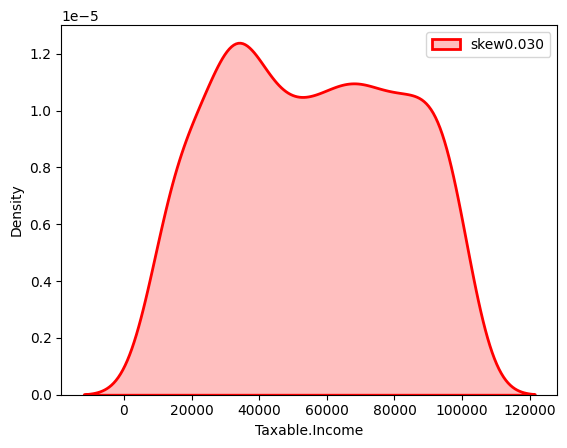

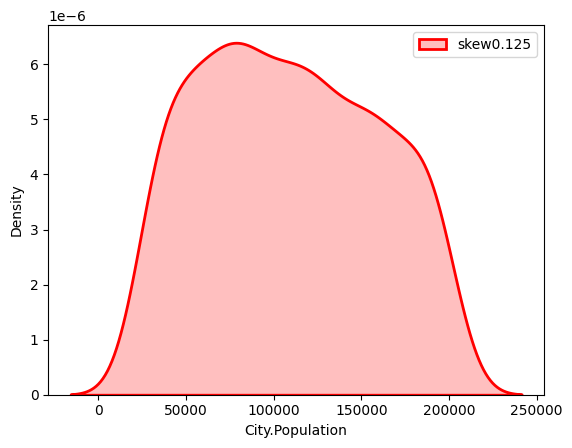

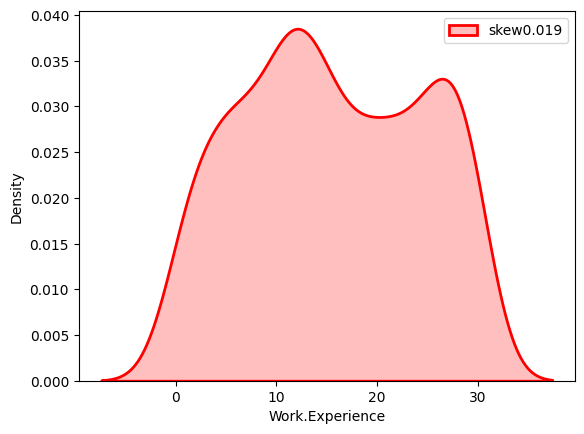

In [27]:
#kdeplot
numerical_features=[feature for feature in fraud.columns if fraud[feature].dtypes!='O']
for f in numerical_features:
  skew=fraud[f].skew()
  sns.kdeplot(fraud[f],label='skew%.3f'%skew,color='red',shade=True,linewidth=2)
  plt.legend()
  plt.show()

In [28]:
#none of the plot is normally distributed

# **Histogram**

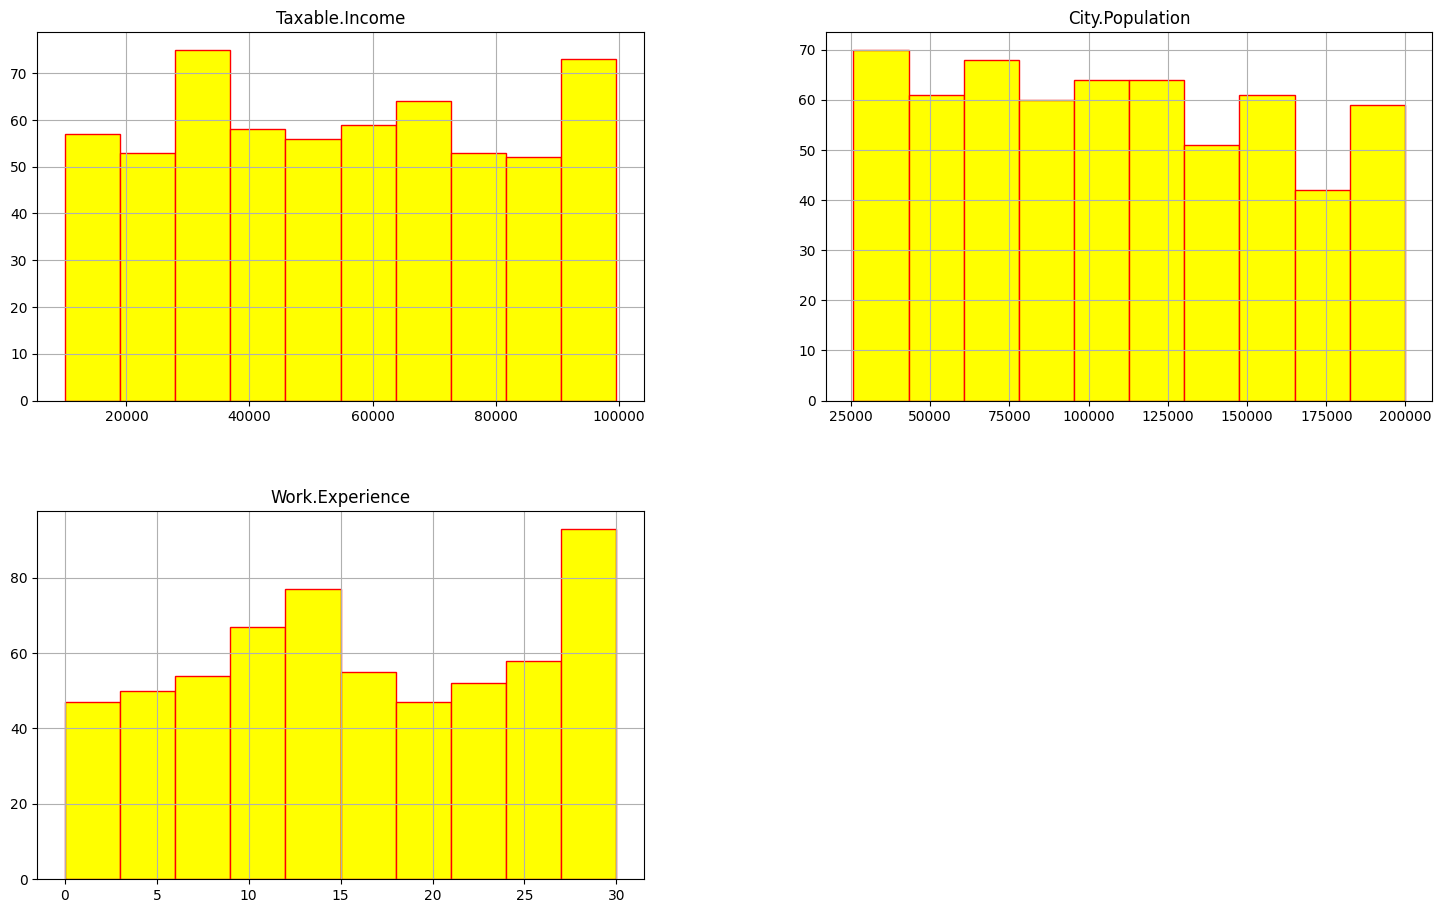

In [29]:
fraud.hist(figsize=(18,11),linewidth=1,edgecolor='red',color='yellow')
plt.grid()
plt.show()

# **Boxplot**

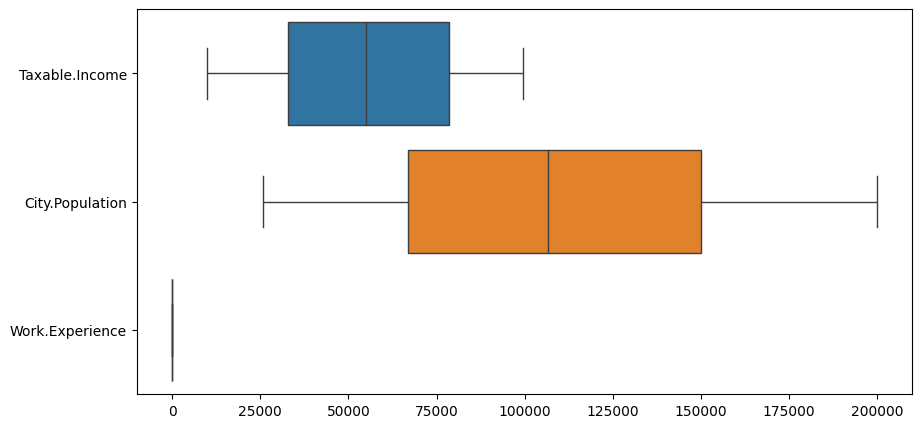

In [30]:
#boxplot
plt.figure(figsize=(10,5))
sns.boxplot(fraud,orient='h')
plt.show()

In [31]:
#no outliers are present

In [32]:
#for categorical data

In [33]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
 6   Tax              600 non-null    object
dtypes: int64(3), object(4)
memory usage: 32.9+ KB


# **CountPlot**

<Axes: xlabel='Undergrad', ylabel='count'>

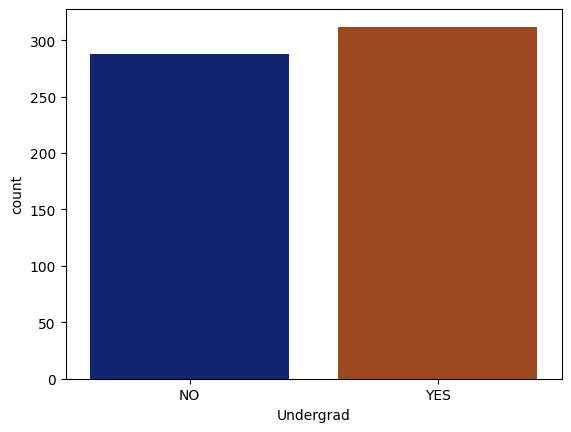

In [34]:
#countplot
sns.countplot(x='Undergrad',data=fraud,palette='dark')

<Axes: xlabel='Marital.Status', ylabel='count'>

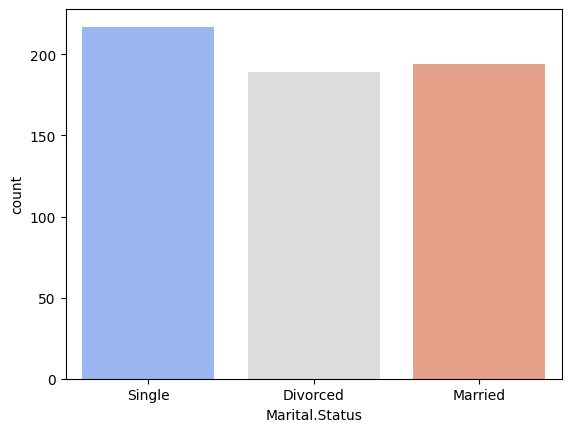

In [35]:
sns.countplot(x='Marital.Status',data=fraud,palette='coolwarm')

<Axes: xlabel='Urban', ylabel='count'>

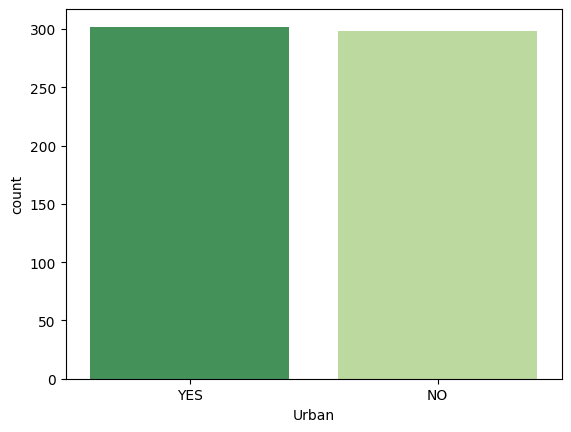

In [36]:
sns.countplot(x='Urban',data=fraud,palette='YlGn_r')

<Axes: xlabel='Tax', ylabel='count'>

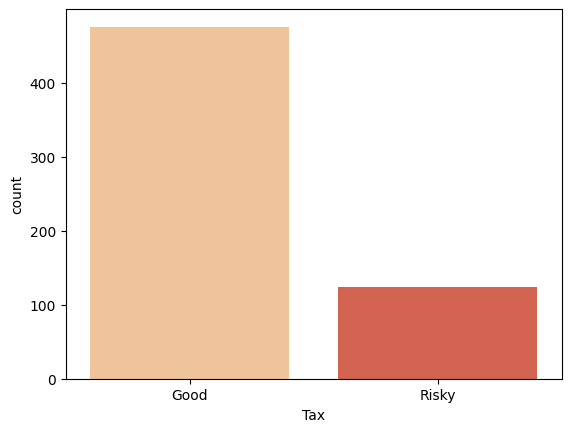

In [37]:
sns.countplot(x='Tax',data=fraud,palette='OrRd')

<Axes: xlabel='Tax', ylabel='Work.Experience'>

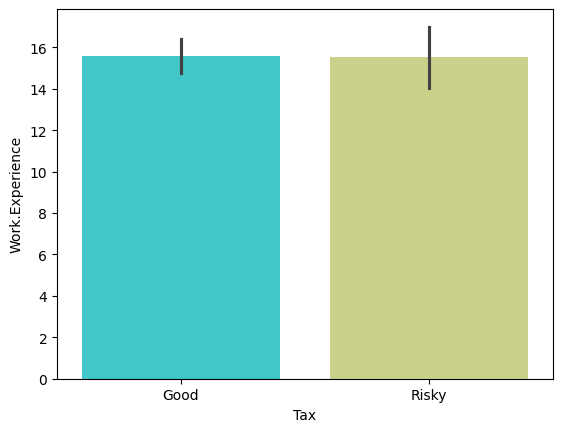

In [38]:
#barplot for tax and experience
sns.barplot(x='Tax',y='Work.Experience',data=fraud,palette='rainbow')

<Axes: xlabel='Tax', ylabel='Taxable.Income'>

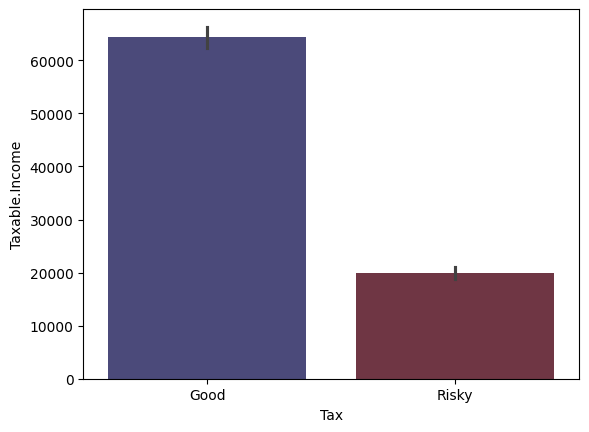

In [39]:
#barplot for tax and taxable income
sns.barplot(x='Tax',y='Taxable.Income',data=fraud,palette='icefire')

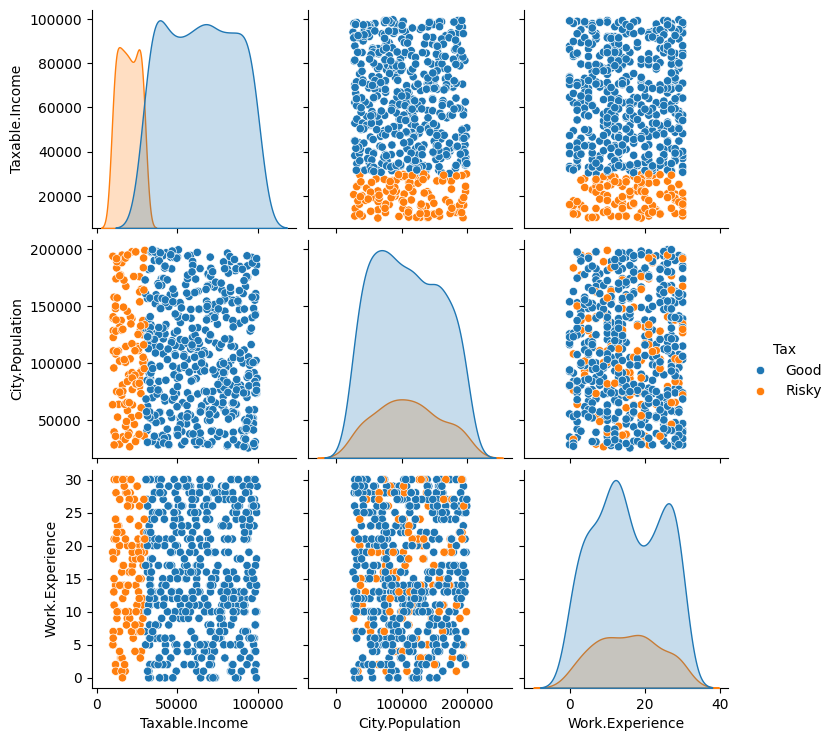

In [40]:
#pairplot
sns.pairplot(data=fraud,hue='Tax')
plt.show()

# **Encoding**

In [41]:
#we have to perform encoding to so convert object into numeric
#Label Encoding and onehotencoding is use

In [42]:
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Tax
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


In [43]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [44]:
fraud[['Undergrad','Marital.Status','Urban']]=fraud[['Undergrad','Marital.Status','Urban']].apply(le.fit_transform)

In [45]:
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Tax
0,0,2,68833,50047,10,1,Good
1,1,0,33700,134075,18,1,Good
2,0,1,36925,160205,30,1,Good
3,1,2,50190,193264,15,1,Good
4,0,1,81002,27533,28,0,Good
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,Good
596,1,0,69967,55369,2,1,Good
597,0,0,47334,154058,0,1,Good
598,1,1,98592,180083,17,0,Good


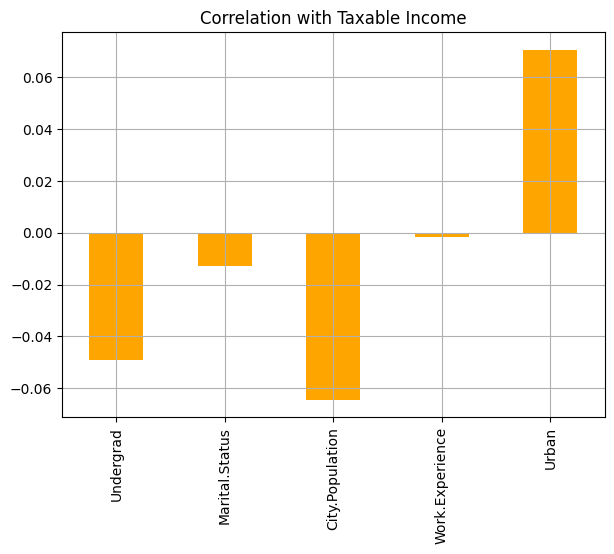

In [46]:
#correlation plot
correlations=fraud.corrwith(fraud['Taxable.Income'])
correlations=correlations[correlations!=1]
positive_correlations=correlations[correlations>0].sort_values(ascending=True)
negative_correlations=correlations[correlations<0].sort_values(ascending=True)
correlations.plot.bar(figsize=(7,5),color='orange',grid=True)
plt.title('Correlation with Taxable Income')
plt.show()

In [47]:
#droping 'Taxable.Income'
fraud.drop('Taxable.Income',axis=1,inplace=True)

In [48]:
#performing one hot encoding on Tax

In [49]:
fraud=pd.get_dummies(fraud,columns=['Tax'])

In [50]:
fraud.drop('Tax_Risky',axis=1,inplace=True)

In [51]:
fraud.rename(columns={'Tax_Good':'Tax'},inplace=True)

In [52]:
fraud

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Tax
0,0,2,50047,10,1,1
1,1,0,134075,18,1,1
2,0,1,160205,30,1,1
3,1,2,193264,15,1,1
4,0,1,27533,28,0,1
...,...,...,...,...,...,...
595,1,0,39492,7,1,1
596,1,0,55369,2,1,1
597,0,0,154058,0,1,1
598,1,1,180083,17,0,1


In [53]:
fraud['Tax'].value_counts()           #here Good=1
                                      #    Risky=0

1    476
0    124
Name: Tax, dtype: int64

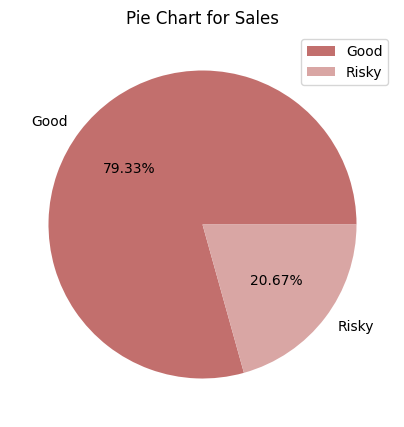

In [54]:
#pie chart
plt.figure(figsize=(5,5))
color=sns.color_palette('vlag_r')
plt.pie(fraud['Tax'].value_counts(),labels=['Good','Risky'],autopct='%.2f%%',colors=color)
plt.title('Pie Chart for Sales')
plt.legend()
plt.show()

#**Spliting into testing and training**

In [55]:
#spliting into independent and dependent features
x=fraud.iloc[:,:-1] #independent features
y=fraud.iloc[:,-1]  #dependent features

# **Features extraction**

In [56]:
from sklearn.feature_selection import SelectKBest , chi2
from numpy import set_printoptions

In [57]:
test=SelectKBest(score_func=chi2,k=5)
fit=test.fit(x,y)

In [58]:
#selecting into important features
score=pd.DataFrame({'features':x.columns,'scores':fit.scores_})
score

,features,scores
0,Undergrad,0.045165
1,Marital.Status,0.014298
2,City.Population,2045.643886
3,Work.Experience,0.011709
4,Urban,0.006951


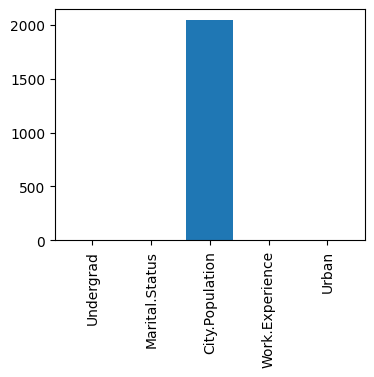

In [59]:
#barplot
plt.figure(figsize=(4,3))
plt.bar(score['features'],score['scores'])
plt.xticks(rotation=90)
plt.show()

**spliting into train and test part**

In [60]:
#spliting into train_test_split
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.32,random_state=39)

In [61]:
xtrain

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
126,1,0,195022,3,1
502,0,1,53240,1,1
421,1,2,135185,13,0
244,1,2,154647,27,0
424,1,1,94199,0,1
...,...,...,...,...,...
582,1,1,32907,12,1
64,1,2,118261,15,0
41,1,1,91524,1,0
105,0,2,46893,15,0


In [62]:
ytrain

126    0
502    1
421    1
244    1
424    1
      ..
582    1
64     1
41     1
105    1
393    1
Name: Tax, Length: 408, dtype: uint8

In [63]:
xtest

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
522,0,0,103343,10,0
225,1,2,125883,0,1
8,0,2,102481,12,1
328,0,0,93414,12,1
352,0,0,72115,16,1
...,...,...,...,...,...
32,1,1,51911,23,0
130,1,2,87730,7,1
344,0,1,192313,5,1
528,0,1,172612,10,0


In [64]:
ytest

522    1
225    1
8      1
328    1
352    0
      ..
32     1
130    1
344    1
528    1
486    1
Name: Tax, Length: 192, dtype: uint8

In [65]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(408, 5)
(408,)
(192, 5)
(192,)


In [66]:
#cross validation

In [67]:
#cross validation
from sklearn.model_selection import KFold
k=KFold(n_splits=8,random_state=39,shuffle=True)

In [68]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

# **Random Forest**

In [69]:
#random forest model
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=82,criterion='gini',max_features=4,max_depth=7,random_state=30)

In [70]:
#cross validation
res=cross_val_score(rf,x,y,cv=k)
print(res)
print('Accuracy:',res.mean())

[0.81333333 0.76       0.8        0.82666667 0.82666667 0.76
 0.74666667 0.78666667]
Accuracy: 0.79


In [71]:
#train test split
rf.fit(xtrain,ytrain)
ypred=rf.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        40
           1       0.79      0.99      0.88       152

    accuracy                           0.79       192
   macro avg       0.40      0.50      0.44       192
weighted avg       0.63      0.79      0.70       192



In [72]:
#accuracy in random forest is 0.79 i.e 79%

***Accuracy : 79%***

# **Bagging Classification**

In [73]:
#bagging classifier model
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [74]:
m=DecisionTreeClassifier(criterion='entropy',max_depth=5)
model=BaggingClassifier(base_estimator=m,n_estimators=100,random_state=38)

In [75]:
#cross validation
res1=cross_val_score(model,x,y,cv=k)
print(res1)
print('Accuracy :',res1.mean())

[0.81333333 0.76       0.8        0.82666667 0.84       0.76
 0.74666667 0.8       ]
Accuracy : 0.7933333333333334


In [76]:
#train_test_split
model.fit(xtrain,ytrain)
ypred1=model.predict(xtest)
print(classification_report(ytest,ypred1))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        40
           1       0.79      0.99      0.88       152

    accuracy                           0.79       192
   macro avg       0.40      0.50      0.44       192
weighted avg       0.63      0.79      0.70       192



In [77]:
#accuracy in bagging model is 0.79 i.e 79%

***Accuracy : 79%***

# **AdaBoost**

In [78]:
#adaboost model
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
m2=LogisticRegression(max_iter=300)
ad=AdaBoostClassifier(n_estimators=25,base_estimator=m2)

In [79]:
#cross validation
res2=cross_val_score(ad,x,y,cv=k)
print(res2)
print('Accuracy :',res2.mean())

[0.81333333 0.76       0.8        0.82666667 0.84       0.76
 0.74666667 0.8       ]
Accuracy : 0.7933333333333334


In [80]:
#train test split
ad.fit(xtrain,ytrain)
ad.predict(xtest)
print(classification_report(ytest,ad.predict(xtest)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        40
           1       0.79      1.00      0.88       152

    accuracy                           0.79       192
   macro avg       0.40      0.50      0.44       192
weighted avg       0.63      0.79      0.70       192



In [81]:
#accuracy adaboost model generate is 0.79 i.e 79%

***Accuracy : 79%***

# **Stacking**


In [82]:
#stacking model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

In [83]:
estimators=[]

In [84]:
v1=LogisticRegression(max_iter=300)
estimators.append(('lr',v1))

In [85]:
v2=DecisionTreeClassifier(criterion='gini',max_depth=4)
estimators.append(('dt',v2))

In [86]:
v3=SVC()
estimators.append(('sv',v3))

In [87]:
v4=RandomForestClassifier(criterion='entropy',n_estimators=300,max_depth=4,max_features=4)
estimators.append(('rf',v4))

In [88]:
estimators

[('lr', LogisticRegression(max_iter=300)),
 ('dt', DecisionTreeClassifier(max_depth=4)),
 ('sv', SVC()),
 ('rf',
  RandomForestClassifier(criterion='entropy', max_depth=4, max_features=4,
                         n_estimators=300))]

In [89]:
voting_estimators=VotingClassifier(estimators)
voting_estimators

VotingClassifier(estimators=[('lr', LogisticRegression(max_iter=300)),
                             ('dt', DecisionTreeClassifier(max_depth=4)),
                             ('sv', SVC()),
                             ('rf',
                              RandomForestClassifier(criterion='entropy',
                                                     max_depth=4,
                                                     max_features=4,
                                                     n_estimators=300))])

In [90]:
#cross validation
res3=cross_val_score(voting_estimators,x,y,cv=10)
print(res3)
print('Accuracy :',res3.mean())

[0.8        0.8        0.8        0.8        0.8        0.8
 0.78333333 0.78333333 0.78333333 0.78333333]
Accuracy : 0.7933333333333333


In [91]:
#train test split
voting_estimators.fit(xtrain,ytrain)
voting_estimators.predict(xtest)
print(classification_report(ytest,voting_estimators.predict(xtest)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        40
           1       0.79      1.00      0.88       152

    accuracy                           0.79       192
   macro avg       0.40      0.50      0.44       192
weighted avg       0.63      0.79      0.70       192



In [92]:
#accuracy stacking model generate is 0.79 i.e 79%

**Accuracy : 79%**

# **XGBM Model**

In [93]:
#xgbm model
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
xg=XGBClassifier(n_estimators=300)

In [94]:
#cross validation
res4=cross_val_score(xg,x,y,cv=k)
print(res4)
print('Accuracy :',res4.mean())

[0.69333333 0.68       0.68       0.68       0.68       0.66666667
 0.65333333 0.66666667]
Accuracy : 0.675


In [95]:
#train test split
xg.fit(xtrain,ytrain)
xg.predict(xtest)
print(accuracy_score(ytest,xg.predict(xtest)))

0.6770833333333334


In [96]:
# accuracy xgbm model generate is 0.677 i.e 68%

**Accuracy : 68%**

# **LGBM Model**

In [97]:
#lgbm model
import lightgbm as lgb
lb=lgb.Dataset(xtrain,label=ytrain)

In [98]:
params = {}

params["learning_rate"] = 0.03
params["metric"]="binary_logloss"
params["min_data"]=50
params["max_depth"]=19

params

{'learning_rate': 0.03,
 'metric': 'binary_logloss',
 'min_data': 50,
 'max_depth': 19}

In [99]:
clf = lgb.train(params,lb,500)
ypred = clf.predict(xtest)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000108 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 175
[LightGBM] [Info] Number of data points in the train set: 408, number of used features: 5
[LightGBM] [Info] Start training from score 0.794118
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

In [100]:
from sklearn.metrics import accuracy_score
ypred = [round(v) for v in ypred]
print(accuracy_score(ytest,ypred))

0.7916666666666666


In [101]:
# accuracy is 79%

**Accuracy : 79%**

# **Tree plot for visualization**

In [102]:
fn=x.columns
cn=['Good','Risky']

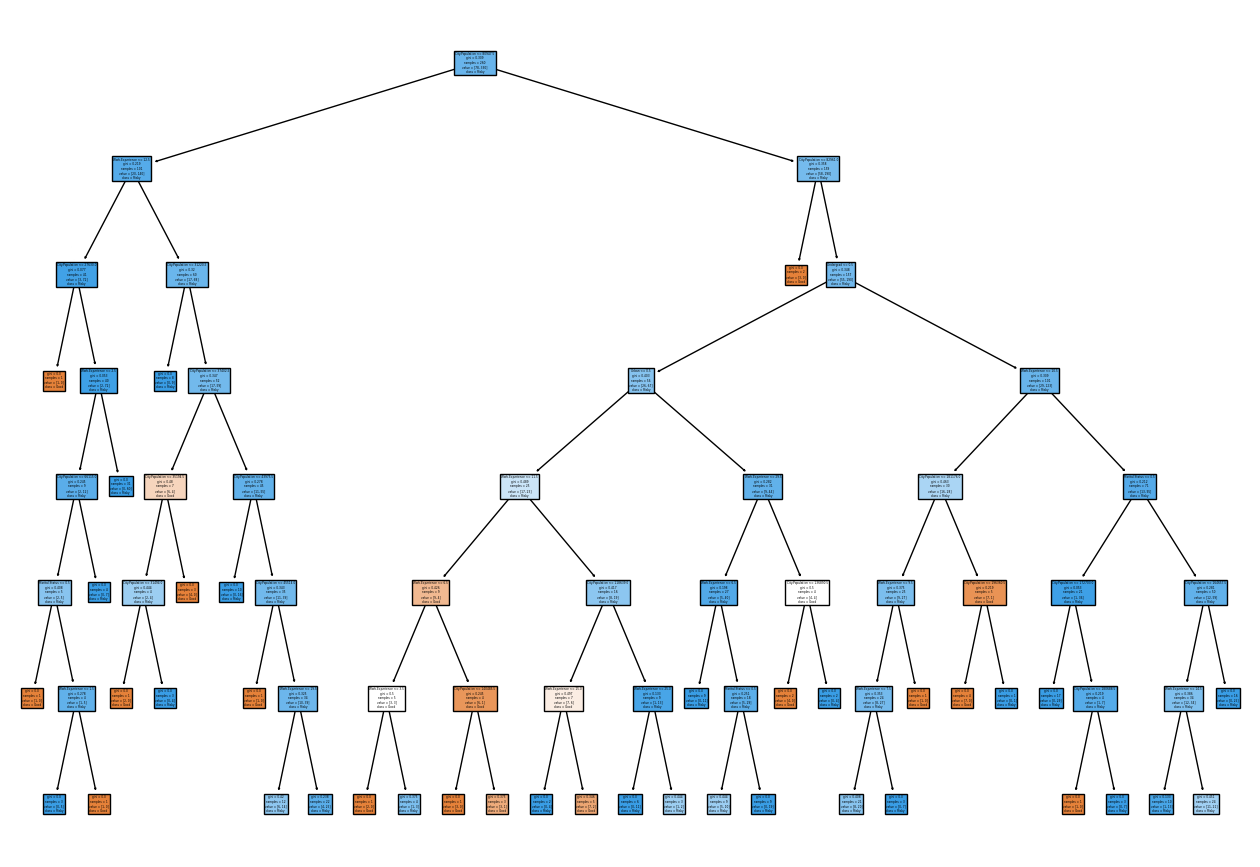

In [103]:
#tree plot
plt.figure(figsize=(16,11))
tree.plot_tree(rf.estimators_[55],feature_names=fn,class_names=cn,filled=True)
plt.show()

# **Conclusion**

In [104]:
# So by performing different models highest accuracy is approximately 79%

In [105]:
###completed/////////

# **Completed**